# Notebook :  00_setup.ipynb

# Notebook : Setup

# About

In this notebook, we will motivate RAG.

We will see why we can't use Large Language Model directly.


# Setup

In [ ]:
%pip install -r ../requirements.txt


In [ ]:
import logging
import rich
import os
import sys

from dotenv import load_dotenv


In [ ]:

#logging.basicConfig(stream=sys.stdout, level=logging.INFO)
#logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [ ]:
#logging.basicConfig(level=logging.DEBUG)


set openai api key in "env" file or set as env variable

In [ ]:

load_dotenv(dotenv_path="../env")

# uncomment below line if not using env file 

#os.environ["OPENAI_API_KEY"] = "..."

# OpenAI calls

In [ ]:
from llama_index.core.llms import ChatMessage
from llama_index.llms.openai import OpenAI



In [ ]:
llm = OpenAI(model="gpt-3.5-turbo",temperature=0)


In [ ]:
system_role_message = "You are helpful tutor that explains complex topics in accessible manner"

## call without full context

In [ ]:
messages = [
    ChatMessage(
        role="system", content= system_role_message
    ),
    ChatMessage(role="user", content="What are LLMs"),
]
resp = llm.chat(messages)

In [ ]:
rich.print(resp.message.content)

In [ ]:
rich.print(resp)

## call with full context

In [ ]:
messages = [
    ChatMessage(
        role="system", content= system_role_message
    ),
    ChatMessage(role="user", content="What are LLMs in machine learning"),
]
resp = llm.chat(messages)

In [ ]:
rich.print(resp.message.content)

## Notes

For us, when we hear `LLMs` we think of machine learning. 

But the term used to was furst used to refere to a graduate degree for lawyers.

So providing relevant context to the LLM is important

# Notebook :  01_why_rag.ipynb

# Notebook : Why Rag

# About

In this notebook, we will motivate Retrieval Augmented Generation (RAG) .

We will see why we can't use Large Language Model directly.



# Imports

In [1]:
from dotenv import load_dotenv
import rich
import logging
from llama_index.core.llms import ChatMessage
from llama_index.llms.openai import OpenAI
from huggingface_hub import InferenceClient
import os

In [2]:
#logging.basicConfig(level=logging.DEBUG)


In [3]:
load_dotenv(dotenv_path="../env")

True

In [4]:
llm = OpenAI(model="gpt-3.5-turbo",temperature=0)


# Problems

There are atleast two problems with using Large Language Model 

- Knoweldge Cutoff
- Hallucination

## Knoweldge Cutoff

In [5]:
llm = OpenAI(model="gpt-4o-mini",temperature=0)


In [6]:
def get_response(query:str):
    messages = [
        ChatMessage(role="user", content=query),
    ]
    
    resp = llm.chat(messages)

    return resp

In [7]:
query="what is different about Llama3.2 than Llama2 ?"


In [8]:
response = get_response(query)

In [9]:
rich.print(response.message.content)

As of my last update in October 2023, specific details about Llama 3.2 compared to Llama 2 have not been officially
released. However, in general, when comparing iterations of AI models like Llama, you can expect improvements in 
several areas:

1. **Model Architecture**: Newer versions often incorporate advancements in model architecture that enhance 
performance, efficiency, and scalability.

2. **Training Data**: Llama 3.2 may be trained on a larger and more diverse dataset, which can improve its 
understanding of language and context.

3. **Performance**: Improvements in natural language understanding, generation quality, and response coherence are 
common in newer models.

4. **Fine-tuning and Adaptability**: Enhanced capabilities for fine-tuning on specific tasks or domains may be 
introduced, allowing for better customization.

5. **Safety and Ethical Considerations**: Newer models often include better mechanisms for handling harmful 
content, bias reduction, and overall ethical AI use.

6. **Efficiency**: Optimizations that reduce computational requirements while maintaining or improving performance 
are often a focus in newer versions.

For the most accurate and detailed information, I recommend checking the official announcements or documentation 
from the developers of the Llama models.

In [10]:
response

ChatResponse(message=ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>, content='As of my last update in October 2023, specific details about Llama 3.2 compared to Llama 2 have not been officially released. However, in general, when comparing iterations of AI models like Llama, you can expect improvements in several areas:\n\n1. **Model Architecture**: Newer versions often incorporate advancements in model architecture that enhance performance, efficiency, and scalability.\n\n2. **Training Data**: Llama 3.2 may be trained on a larger and more diverse dataset, which can improve its understanding of language and context.\n\n3. **Performance**: Improvements in natural language understanding, generation quality, and response coherence are common in newer models.\n\n4. **Fine-tuning and Adaptability**: Enhanced capabilities for fine-tuning on specific tasks or domains may be introduced, allowing for better customization.\n\n5. **Safety and Ethical Considerations**: Newer models often in

In [11]:
rich.print(response)

ChatResponse(
    message=ChatMessage(
        role=<MessageRole.ASSISTANT: 'assistant'>,
        content='As of my last update in October 2023, specific details about Llama 3.2 compared to Llama 2 have 
not been officially released. However, in general, when comparing iterations of AI models like Llama, you can 
expect improvements in several areas:\n\n1. **Model Architecture**: Newer versions often incorporate advancements 
in model architecture that enhance performance, efficiency, and scalability.\n\n2. **Training Data**: Llama 3.2 may
be trained on a larger and more diverse dataset, which can improve its understanding of language and context.\n\n3.
**Performance**: Improvements in natural language understanding, generation quality, and response coherence are 
common in newer models.\n\n4. **Fine-tuning and Adaptability**: Enhanced capabilities for fine-tuning on specific 
tasks or domains may be introduced, allowing for better customization.\n\n5. **Safety and Ethical Considerations**:
Newer models often include better mechanisms for handling harmful content, bias reduction, and overall ethical AI 
use.\n\n6. **Efficiency**: Optimizations that reduce computational requirements while maintaining or improving 
performance are often a focus in newer versions.\n\nFor the most accurate and detailed information, I recommend 
checking the official announcements or documentation from the developers of the Llama models.',
        additional_kwargs={}
    ),
    raw=ChatCompletion(
        id='chatcmpl-APXHJVVHV9JHNwiuJ6rNAgtyEQSsT',
        choices=[
            Choice(
                finish_reason='stop',
                index=0,
                logprobs=None,
                message=ChatCompletionMessage(
                    content='As of my last update in October 2023, specific details about Llama 3.2 compared to 
Llama 2 have not been officially released. However, in general, when comparing iterations of AI models like Llama, 
you can expect improvements in several areas:\n\n1. **Model Architecture**: Newer versions often incorporate 
advancements in model architecture that enhance performance, efficiency, and scalability.\n\n2. **Training Data**: 
Llama 3.2 may be trained on a larger and more diverse dataset, which can improve its understanding of language and 
context.\n\n3. **Performance**: Improvements in natural language understanding, generation quality, and response 
coherence are common in newer models.\n\n4. **Fine-tuning and Adaptability**: Enhanced capabilities for fine-tuning
on specific tasks or domains may be introduced, allowing for better customization.\n\n5. **Safety and Ethical 
Considerations**: Newer models often include better mechanisms for handling harmful content, bias reduction, and 
overall ethical AI use.\n\n6. **Efficiency**: Optimizations that reduce computational requirements while 
maintaining or improving performance are often a focus in newer versions.\n\nFor the most accurate and detailed 
information, I recommend checking the official announcements or documentation from the developers of the Llama 
models.',
                    refusal=None,
                    role='assistant',
                    audio=None,
                    function_call=None,
                    tool_calls=None
                )
            )
        ],
        created=1730649485,
        model='gpt-4o-mini-2024-07-18',
        object='chat.completion',
        service_tier=None,
        system_fingerprint='fp_0ba0d124f1',
        usage=CompletionUsage(
            completion_tokens=250,
            prompt_tokens=21,
            total_tokens=271,
            completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=0),
            prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)
        )
    ),
    delta=None,
    logprobs=None,
    additional_kwargs={'prompt_tokens': 21, 'completion_tokens': 250, 'total_tokens': 271}
)

note the model is aliased to `model='gpt-4o-mini-2024-07-18'`.

So, the model's training data wont have any information after then.

## Hallucination

![Snapshot of Hallucination](../images/llama_2__hallucination.png)


In the above video, we ask about non existant Llama model.

We also give it a link to a study music youtube video.

Note: we are also using an "older" version of Llama model to make the inference

In [12]:
client = InferenceClient(api_key=os.environ['HF_API_KEY'])

In [13]:
message = f"""
What did Andrej Karpathy say about Meta's Llama 5.9 in the below youtube talk

https://www.youtube.com/watch?v=n61ULEU7CO0&ab_channel=LofiGirl

"""

In [14]:
messages = [
    { "role": "user", "content": message },
]

response = client.chat.completions.create(
    model="meta-llama/Llama-2-7b-chat-hf", 
    messages=messages, 
    temperature=0,
)

In [15]:
rich.print(response)

ChatCompletionOutput(
    choices=[
        ChatCompletionOutputComplete(
            finish_reason='length',
            index=0,
            message=ChatCompletionOutputMessage(
                role='assistant',
                content="  Andrej Karpathy, a well-known computer scientist and researcher, did not make any 
comments about Meta's Llama 5.9 in the YouTube talk you provided. The talk is actually about the use of language 
models in music generation, and Karpathy's comments are focused on the topic of language models and their 
applications in various fields.\n\nTherefore, I cannot provide any information about what Karpathy said about 
Meta's Llama",
                tool_calls=None
            ),
            logprobs=None
        )
    ],
    created=1730649490,
    id='',
    model='meta-llama/Llama-2-7b-chat-hf',
    system_fingerprint='2.3.1-dev0-sha-169178b',
    usage=ChatCompletionOutputUsage(completion_tokens=100, prompt_tokens=67, total_tokens=167)
)

In [16]:
rich.print(response.choices[0].message.content)

Andrej Karpathy, a well-known computer scientist and researcher, did not make any comments about Meta's Llama 5.9
in the YouTube talk you provided. The talk is actually about the use of language models in music generation, and 
Karpathy's comments are focused on the topic of language models and their applications in various fields.

Therefore, I cannot provide any information about what Karpathy said about Meta's Llama

## Notes

We explored at least two problems with directly using LLMs directly. 

- Knowledge Cuttoff  
- Hallucination.



# Notebook :  02_extracting_metadata.ipynb

# Notebook : Extracting Metadata


# About

In this notebook, we will explore how to extract content from video. 

- metadata
- transcript
- core youtube frames

In [52]:
import rich
from pathlib import Path
import os
from IPython.display import Code


# Sample Video

In [2]:
from IPython.display import YouTubeVideo


In [3]:
video_id = 'ODluYyMZzs0'

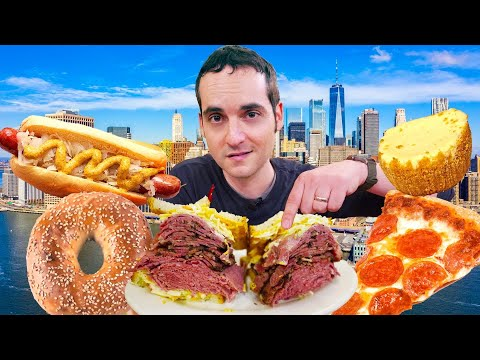

In [4]:
video_obj = YouTubeVideo(video_id, width=800, height=400)
video_obj

In [5]:
video_url = f"https://www.youtube.com/watch?v={video_id}"
print (video_url)

https://www.youtube.com/watch?v=ODluYyMZzs0


![Information in a youtube video](../images/video_metadata.png)


There is a lot of information in the youtube description. 

But a lot of space is taken for socials and affliate links.

# Extracting content (text)

There is a great library that makes it easy to extract youtube information

In [6]:
from pytubefix import YouTube

In [7]:
yt = YouTube(video_url)

basic video info

In [8]:
print (f"""

Title: {yt.title}
Author: {yt.author}
Publish Date: {yt.publish_date}
Video Length : {yt.length}

Video Id : {yt.video_id}
Channel Id : {yt.channel_id}
Thumbnail Url : {yt.thumbnail_url}
Watch Url : {yt.watch_url}


""")



Title: Top 5 NYC Foods You MUST TRY Before You Die!
Author: Here Be Barr
Publish Date: 2023-04-16 08:00:08-07:00
Video Length : 757

Video Id : ODluYyMZzs0
Channel Id : UCmKNW9ontOlTd_p4Dg51sRQ
Thumbnail Url : https://i.ytimg.com/vi/ODluYyMZzs0/sddefault.jpg?v=643c0345
Watch Url : https://youtube.com/watch?v=ODluYyMZzs0





description

In [9]:
print (yt.description)

For 24 Hours we'll eat the most iconic food that New York has to offer. From pizza, to pastrami, bagels, hot dogs and more, join us on this epic NYC Food Tour in 2023!
🎨 Buy an NYC Art Print/Postcard from Adriana's Store: https://www.etsy.com/shop/illustrationsbyadri
🛒 SHOP our NEW NYC Guides For Your Next Trip: http://www.thatch.co/@herebebarr
⭐ CHEAPEST Way To Book NYC Attractions:  https://gyg.me/J449y9gl

📝 GET Your FREE First-Timers GUIDE to NYC: https://my.ny-guide.com/freenycguide

✔️ SUBSCRIBE NOW! DON’T FORGET! The more the merrier! :)

🍕 Buy Me A Slice of Pizza: https://www.buymeacoffee.com/herebebarr
✈️ TRAVEL FOR FREE With These Rewards Credit Cards: http://bit.ly/328jVBX
👕 Buy Some Merchandise (T-Shirts/Hoodies/Coffee Mugs): https://teespring.com/stores/here-be-barrs-store

CONNECT-
✅ VISIT MY WEBSITE: http://www.ny-guide.com
✅ FOLLOW ME ON IG: http://www.instagram.com/here.be.barr
✅ FOLLOW ME ON TWITTER: http://www.twitter.com/herebebarr
✅ LIKE US ON FACEBOOK: http://www.

engagement info

In [10]:
print (f"""

Likes: {yt.likes}
Rating: {yt.rating}
Views: {yt.views}
Video Length : {yt.length}
""")



Likes: None
Rating: None
Views: 690474
Video Length : 757



Youtube Chapters

Video chapters add info and context to each portion of the video and let you easily rewatch different parts of the video. 

Creators can add their own video chapters for each uploaded video or rely on automatic video chapters.

[Link](https://support.google.com/youtube/answer/9884579?hl=en)

In [11]:
rich.print( yt.chapters)

[
    <Chapter: Intro | 0:00:00>,
    <Chapter: 1) Absolute Bagels- 2788 Broadway (b/w 107th and 108th), New York, NY | 0:00:18>,
    <Chapter: 2) Billy's Hot Dog Cart- 93rd and Central Park West, New York, NY | 0:02:38>,
    <Chapter: 3) Sarge's Deli- 548 3rd Ave. bwn 36th and 37th New York, NY | 0:05:37>,
    <Chapter: 4) Bleecker Street Pizza- 69 7th Ave S, New York, NY | 0:07:50>,
    <Chapter: 5) Eileen's Special Cheesecake- 17 Cleveland Pl, New York, NY | 0:10:38>
]

heatmap

data about "most replayed" graph for videos on Youtube.



In [12]:
rich.print(yt.replayed_heatmap[:5])


[
    {'start_seconds': 0.0, 'duration': 7.57, 'norm_intensity': 0.4575291672812642},
    {'start_seconds': 7.57, 'duration': 7.57, 'norm_intensity': 0.040002022452298704},
    {'start_seconds': 15.14, 'duration': 7.57, 'norm_intensity': 0.1911015884195596},
    {'start_seconds': 22.71, 'duration': 7.57, 'norm_intensity': 0.18164624954898315},
    {'start_seconds': 30.28, 'duration': 7.57, 'norm_intensity': 0.1407469146787192}
]

## Youtube Transcript

In [13]:
from youtube_transcript_api import YouTubeTranscriptApi 
import re

In [14]:
video_url

'https://www.youtube.com/watch?v=ODluYyMZzs0'

In [15]:
transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)

In [16]:
rich.print (transcript_dict )

[
    {'text': 'New York City has some absolutely iconic', 'start': 0.0, 'duration': 4.62},
    {'text': "food and today that's all I'm going to", 'start': 2.76, 'duration': 3.48},
    {'text': "be eating we'll show you New York's best", 'start': 4.62, 'duration': 4.86},
    {'text': 'bagels hot dogs Pastrami and more get', 'start': 6.24, 'duration': 6.0},
    {'text': 'ready for the ultimate NYC food tour and', 'start': 9.48, 'duration': 5.159},
    {'text': 'this video is filmed in order so you can', 'start': 12.24, 'duration': 4.56},
    {'text': 'literally turn this into a bucket list', 'start': 14.639, 'duration': 6.14},
    {'text': 'New York City Food Adventure if you want', 'start': 16.8, 'duration': 3.979},
    {'text': 'The Bagel the breakfast icon of New York', 'start': 23.18, 'duration': 5.62},
    {'text': 'City brought here by polish Jewish', 'start': 26.46, 'duration': 4.559},
    {'text': 'immigrants at the turn of the 20th', 'start': 28.8, 'duration': 4.2},
    {'text': 'century is there a more New York City', 'start': 31.019, 'duration': 4.2},
    {'text': 'breakfast than this debatable well you', 'start': 33.0, 'duration': 4.38},
    {'text': 'can tell they mean business when 12 30', 'start': 35.219, 'duration': 4.441},
    {'text': "on a Monday there's already a super long", 'start': 37.38, 'duration': 5.04},
    {'text': "line an absolute I've heard from so many", 'start': 39.66, 'duration': 4.5},
    {'text': 'is the best bagel in New York City and', 'start': 42.42, 'duration': 4.139},
    {'text': "this is the only spot in the video I've", 'start': 44.16, 'duration': 5.04},
    {'text': "never been to so let's find out oh those", 'start': 46.559, 'duration': 4.68},
    {'text': "look so good it's passing the visual", 'start': 49.2, 'duration': 3.12},
    {'text': 'test', 'start': 51.239, 'duration': 2.941},
    {'text': 'how are you can I get an everything', 'start': 52.32, 'duration': 3.8},
    {'text': 'bagel with scallion cream cheese please', 'start': 54.18, 'duration': 4.68},
    {'text': "no thank you all right let's investigate", 'start': 56.12, 'duration': 5.32},
    {'text': 'this is the Story of My Life Line dies', 'start': 58.86, 'duration': 5.04},
    {'text': 'the second we head out', 'start': 61.44, 'duration': 4.74},
    {'text': '[Music]', 'start': 63.9, 'duration': 4.38},
    {'text': 'everyone in New York generally thinks', 'start': 66.18, 'duration': 3.54},
    {'text': "where they're from has the best bagels", 'start': 68.28, 'duration': 3.12},
    {'text': 'their neighborhood spot is the best and', 'start': 69.72, 'duration': 3.439},
    {'text': "I've heard about absolute for years", 'start': 71.4, 'duration': 4.92},
    {'text': 'finally gonna be trying this legendary', 'start': 73.159, 'duration': 5.621},
    {'text': 'Bagel here Morningside Heights you know', 'start': 76.32, 'duration': 4.26},
    {'text': "didn't see a single tourist in line it", 'start': 78.78, 'duration': 4.019},
    {'text': 'was like all Columbia students all right', 'start': 80.58, 'duration': 5.96},
    {'text': "let's try this this looks amazing", 'start': 82.799, 'duration': 3.741},
    {'text': 'hmm chewy on the outside soft on the', 'start': 90.479, 'duration': 5.941},
    {'text': 'inside this is how a New York bagel has', 'start': 94.38, 'duration': 4.5},
    {'text': 'to be wow all these years living in the', 'start': 96.42, 'duration': 3.54},
    {'text': 'city a dozen years I never tried', 'start': 98.88, 'duration': 2.699},
    {'text': 'absolute people push me all the time to', 'start': 99.96, 'duration': 3.839},
    {'text': "try it but I'm glad I finally came that", 'start': 101.579, 'duration': 4.261},
    {'text': 'first impression instantly this is going', 'start': 103.799, 'duration': 3.601},
    {'text': 'towards the top of my list for New York', 'start': 105.84, 'duration': 2.33},
    {'text': 'City Bagels', 'start': 107.4, 'duration': 3.38},
    {'text': '[Music]', 'start': 108.17, 'dur

From above, we can see the transcript seems pretty good, but they are not full sentences.   

It doesn't capture punctuation and is of varing length.

## Yotube Transcript using LLamaHub Dataloader

[LlamaHub](https://llamahub.ai/)



In [17]:
from llama_index.readers.youtube_transcript import YoutubeTranscriptReader


In [18]:

loader = YoutubeTranscriptReader()
documents = loader.load_data(
    ytlinks=[video_url]
)

In [19]:
len(documents)

1

In [20]:
rich.print (documents[0] )

Document(
    id_='ODluYyMZzs0',
    embedding=None,
    metadata={'video_id': 'ODluYyMZzs0'},
    excluded_embed_metadata_keys=[],
    excluded_llm_metadata_keys=[],
    relationships={},
    text="New York City has some absolutely iconic\nfood and today that's all I'm going to\nbe eating we'll show 
you New York's best\nbagels hot dogs Pastrami and more get\nready for the ultimate NYC food tour and\nthis video is
filmed in order so you can\nliterally turn this into a bucket list\nNew York City Food Adventure if you want\nThe 
Bagel the breakfast icon of New York\nCity brought here by polish Jewish\nimmigrants at the turn of the 
20th\ncentury is there a more New York City\nbreakfast than this debatable well you\ncan tell they mean business 
when 12 30\non a Monday there's already a super long\nline an absolute I've heard from so many\nis the best bagel 
in New York City and\nthis is the only spot in the video I've\nnever been to so let's find out oh those\nlook so 
good it's passing the visual\ntest\nhow are you can I get an everything\nbagel with scallion cream cheese 
please\nno thank you all right let's investigate\nthis is the Story of My Life Line dies\nthe second we head 
out\n[Music]\neveryone in New York generally thinks\nwhere they're from has the best bagels\ntheir neighborhood 
spot is the best and\nI've heard about absolute for years\nfinally gonna be trying this legendary\nBagel here 
Morningside Heights you know\ndidn't see a single tourist in line it\nwas like all Columbia students all 
right\nlet's try this this looks amazing\nhmm chewy on the outside soft on the\ninside this is how a New York bagel
has\nto be wow all these years living in the\ncity a dozen years I never tried\nabsolute people push me all the 
time to\ntry it but I'm glad I finally came that\nfirst impression instantly this is going\ntowards the top of my 
list for New York\nCity Bagels\n[Music]\nwe're eating so much food today that I\ndid not want to get locks any of 
their\nsalmon choices the appetizing stuff I\nwant to try that at some point but I\nhave to tell you I'm struggling
right\nnow to think of a better Bagel I've ever\nhad in New York old statement coming I\nthink this is the best 
bagel I've ever\nhad in New York City I would put this in\na textbook for a New York City Bagel and\na very 
important note for you all hash\nonly I saw people rushing out telling\ntheir friends they'll go to the 
ATM\nmachine there was a little bit of\nconfusion with that but they don't take\npre-orders they don't do delivery 
they\ndo one thing they do it well Bagels cash\nonly and I mean they have that right\nthey've earned it in my 
opinion absolute\nBagels absolutely recommended what a\nstart to this iconic New York City food\ntour\nforeign\nTy 
more iconic in cinema than somebody\ngrabbing a straight hot dog in the city\nwell we've got Billy's here and 
the\nstory with him is we included him in our\nbest reviewed hot dog video last year\nand his hot dog stand really 
blew up an\ninternational popularity YouTube\nchannels covered him a lot of my viewers\nfrom all over the world 
said he was\nfantastic let's go pay him a visit and\nsee if he remembers us love it always a\nline Billy is a local
Legend I've been\ncoming to him since I was\nmid-30s oh wow I'm 67 years old 30 years\nhuh\nbest in the city well 
he's always here\nyeah people have been coming to this guy\nfor decades remember me best reviewed\nhot dogs in New 
York City\nuh we're doing different spots hot dogs\npastrami like the best of each category\nand your hot dog you 
deserve it man you\ndeserve it\noh yeah but you do a great job man so I\njust want to thank you\ntoo I appreciate 
it you got a hard job\nman you you got the whole neighborhood\nhere you know\nno no yeah okay got the baby yes 
sir\nhere he is six months\nhe's a big boy you're right she was\npregnant he tried your hot dog while\nstill in the
womb\nanything you want to say to the people\nthanks to everybody that's all than

In [21]:
type(documents[0])

llama_index.core.schema.Document

## Extracting content (video)

videos, frames, and will be saved here

In [35]:
from moviepy.editor import VideoFileClip


In [36]:
data_folder = "../data/"
Path(data_folder).mkdir(parents=True, exist_ok=True)

In [37]:
yt = YouTube(video_url, use_po_token=False)

In [38]:
yt

<pytubefix.__main__.YouTube object: videoId=ODluYyMZzs0>

In [42]:
output_path = os.path.join(data_folder, video_id)
video_file_path = os.path.join(output_path, "video.mp4")

os.makedirs(os.path.join(output_folder,"images"), exist_ok=True)


In [40]:
yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="video.mp4"
    )

'/home/jupyter/pydata_rag_video/notebooks/../data/ODluYyMZzs0/video.mp4'

to simplify the next section, all the code we went over is shared in a utility file

In [55]:
Code(filename='video_utils.py', language='python')


from moviepy.editor import VideoFileClip
from pathlib import Path
from pytubefix import YouTube
from pprint import pprint
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
from youtube_transcript_api import YouTubeTranscriptApi
import re


def get_video_metadata(yt:YouTube):
    #yt = YouTube(video_id)

    return {
        "video_id": yt.video_id,
        "title": yt.title,
        "author": yt.author,
        "keywords": yt.keywords,

        "publish_date": yt.publish_date.isoformat(),

        "length": yt.length,
        "likes": yt.likes,
        "views": yt.views,
        "channel_id": yt.channel_id,
        "thumbnail_url": yt.thumbnail_url,
        "description": yt.description,

    }


def get_youtube_id(link:str):
    """Extracts the video ID from a YouTube video link."""
    if "youtube.com" in link:
        pattern = r'youtube\.com/watch\?v=([a-zA-Z0-9_-]+)'
        video_id = re.search(pattern, link).group(1)
        return video_id
    elif "youtu.be" in link:
        pattern = r"youtu\.be/([a-zA-Z0-9_-]+)"
        video_id = re.search(pattern, link).group(1)
        return video_id
    else:
        return None

def get_transcript(video_id:str):
    try:
        transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)
        final_transcript = " ".join(i["text"] for i in transcript_dict)
        return final_transcript , transcript_dict
    except Exception as e:
        print(e)


def get_transcript_time(link:str):
    """Gets the transcript of a YouTube video with timestamps."""
    video_id =get_youtube_id(link)

    try:
        transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)
        final_transcript = ""
        for i in transcript_dict:
            timevar = round(float(i["start"]))
            hours = int(timevar // 3600)
            timevar %= 3600
            minutes = int(timevar // 60)
            timevar %= 60
            timevex = f"{hours:02d}:{minutes:02d}:{timevar:02d}"
            final_transcript += f'{i["text"]} "time:{timevex}" '
        return final_transcript
    except Exception as e:
        print(e)
        return video_id



def download_video(video_id:str, output_path):
    """
    Download a video from a given url and save it to the output path.

    Parameters:
    url (str): The url of the video to download.
    output_path (str): The path to save the video to.

    Returns:
    dict: A dictionary containing the metadata of the video.
    """

    url =  f"https://www.youtube.com/watch?v={video_id}"
    print (url)
    yt = YouTube(url, use_po_token=False)
    metadata = get_video_metadata(yt)

    transcript,transcript_dict = get_transcript(video_id)

    with open(os.path.join(output_path,"transcript.txt"),"w") as f:
        f.write(transcript)



    with open(os.path.join(output_path,"metadata.json"),"w") as f:
        json.dump(metadata,f, indent=4)

    yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="video.mp4"
    )
    return metadata


def video_to_images(video_path, output_folder,fps=0.2):
    """
    Convert a video to a sequence of images and save them to the output folder.

    Parameters:
    video_path (str): The path to the video file.
    output_folder (str): The path to the folder to save the images to.

    """
    clip = VideoFileClip(video_path)

    os.makedirs(os.path.join(output_folder,"images"), exist_ok=True)
    clip.write_images_sequence(
        os.path.join(output_folder,"images", "frame%04d.png"), fps=fps
    )

# Notes

We explored how to: 
- extract video metadata
- fetch video transcipt
- download video 


Thanks to great libraries : pytubefix, youtube_transcript_api



# Notebook :  03_chunking.ipynb

# Notebook : Chunking


# About

In this notebook, we will explore how to to break the text into manageable chunks using different strategy.

- Fixed Character / Token Length
- Recursive Character Chunking
- Document Specific Chunking ( PDF, Markdown, HTML, Code)
- Semantic Chunking


In [1]:
import rich
from IPython.display import Image


# Sample Transcript

In [2]:
transcript = f"""

New York City has some absolutely iconic food and today that's all I'm going to be eating.
We'll show you New York's best bagels hot dogs Pastrami and more.  
Get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure. 
"""

In [3]:
print (transcript)



New York City has some absolutely iconic food and today that's all I'm going to be eating.
We'll show you New York's best bagels hot dogs Pastrami and more.  
Get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure. 



# Token

By default, LlamaIndex uses a global tokenizer for all token counting. 

This defaults to `cl100k` from tiktoken, which is the tokenizer to match the default LLM gpt-3.5-turbo.

In [4]:
import tiktoken

In [46]:
encoding_gpt4 = tiktoken.encoding_for_model("gpt-4o-mini")
encoding_gpt4

<Encoding 'o200k_base'>

In [47]:
encoding_gpt3 = tiktoken.encoding_for_model("gpt-3.5-turbo")
encoding_gpt3

<Encoding 'cl100k_base'>

In [48]:
sample_sentence = "Artificial intelligence is transforming industries. Neuroplasticity and adaptability"


In [57]:
tokens = encoding_gpt3.encode(sample_sentence)

decoded_tokens = [encoding_gpt3.decode([token]) for token in tokens]

rich.print ("tokens:", tokens )

rich.print ("decoded tokens:", decoded_tokens )



tokens:
[9470, 16895, 11478, 374, 46890, 19647, 13, 32359, 501, 5174, 488, 323, 10737, 2968]

decoded tokens:
[
    'Art',
    'ificial',
    ' intelligence',
    ' is',
    ' transforming',
    ' industries',
    '.',
    ' Neuro',
    'pl',
    'astic',
    'ity',
    ' and',
    ' adapt',
    'ability'
]

In [59]:
tokens = encoding_gpt4.encode(sample_sentence)

decoded_tokens = [encoding_gpt4.decode([token]) for token in tokens]

rich.print ("tokens:", tokens )

rich.print ("decoded tokens:", decoded_tokens )


tokens:
[186671, 22990, 382, 64779, 22751, 13, 89022, 187126, 536, 326, 188637]

decoded tokens:
[
    'Artificial',
    ' intelligence',
    ' is',
    ' transforming',
    ' industries',
    '.',
    ' Neuro',
    'plastic',
    'ity',
    ' and',
    ' adaptability'
]

Different OpenAI models might use a different tokenizer.    

Notice the larger tokenizer `o200k_base` is able to recognize more tokens

# Token Text Splitter

In [ ]:
from llama_index.core.node_parser import TokenTextSplitter
from llama_index.core import Document


![TokenTextSplitter](../images/token_text_splitter.png)


no text overalap

In [ ]:
node_parser = TokenTextSplitter(chunk_size=25, chunk_overlap=0)
chunks = node_parser.split_text(transcript)

In [ ]:
len(transcript), len(chunks)

In [ ]:
rich.print (chunks [:5] )

Notice in the first sentence `we'll show you New` is part of another sentence, but it is captured

text overlap

because we might loose context, it might be helpful to capture part of the previous sentence

In [ ]:
node_parser = TokenTextSplitter(chunk_size=25, chunk_overlap=5)
chunks = node_parser.split_text(transcript)

In [ ]:
len(transcript), len(chunks)

In [ ]:
rich.print (chunks [:5] )

# Sentence Splitter

Parse text with a preference for complete sentences.

In general, this class tries to keep sentences and paragraphs together. 

Therefore compared to the original TokenTextSplitter, there are less likely to be hanging sentences or parts of sentences at the end of the node chunk.

[Docs](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/sentence_splitter/)

In [ ]:
from llama_index.core.node_parser import SentenceSplitter


In [ ]:
node_parser = SentenceSplitter(chunk_size=25, chunk_overlap=5)
chunks = node_parser.split_text(transcript)

In [ ]:
len(transcript), len(chunks)

In [ ]:
rich.print (chunks [:5] )

notice the first sentence is captured completely.

# Example with Youtube Transcrip

In [ ]:
transcript_yt = """
New York City has some absolutely iconic food and today that's all I'm going to be eating we'll show you New York's best bagels hot dogs Pastrami and more get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure if you want The Bagel the breakfast icon of New York City brought here by polish Jewish immigrants at the turn of the 20th century is there a more New York City breakfast than this debatable well you can tell they mean business when 12 30 on a Monday there's already a super long line an absolute I've heard from so many is the best bagel in New York City and this is the only spot in the video I've never been to so let's find out oh those look so good it's passing the visual test how are you can I get an everything bagel with scallion cream cheese please no thank you all right let's investigate this is the Story of My Life Line dies the second we head out [Music] everyone in New York generally thinks where they're from has the best bagels their neighborhood spot is the best and I've heard about absolute for years finally gonna be trying this legendary Bagel here Morningside Heights you know didn't see a single tourist in line it was like all Columbia students all right let's try this this looks amazing hmm chewy on the outside soft on the inside this is how a New York bagel has to be wow all these years living in the city a dozen years I never tried absolute people push me all the time to try it but I'm glad I finally came that first impression instantly this is going towards the top of my list for New York City Bagels [Music] we're eating so much food today that I did not want to get locks any of their salmon choices the appetizing stuff I want to try that at some point but I have to tell you I'm struggling right now to think of a better Bagel I've ever had in New York old statement coming I think this is the best bagel I've ever had in New York City I would put this in a textbook for a New York City Bagel and a very important note for you all hash only I saw people rushing out telling their friends they'll go to the ATM machine there was a little bit of confusion with that but they don't take pre-orders they don't do delivery they do one thing they do it well Bagels cash only and I mean they have that right they've earned it in my opinion absolute Bagels absolutely recommended what a start to this iconic New York City food tour foreign Ty more iconic in cinema than somebody grabbing a straight hot dog in the city well we've got Billy's here and the story with him is we included him in our best reviewed hot dog video last year and his hot dog stand really blew up an international popularity YouTube channels covered him a lot of my viewers from all over the world said he was fantastic let's go pay him a visit and see if he remembers us love it always a line Billy is a local Legend I've been coming to him since I was mid-30s oh wow I'm 67 years old 30 years huh best in the city well he's always here yeah people have been coming to this guy for decades remember me best reviewed hot dogs in New York City uh we're doing different spots hot dogs pastrami like the best of each category and your hot dog you deserve it man you deserve it oh yeah but you do a great job man so I just want to thank you too I appreciate it you got a hard job man you you got the whole neighborhood here you know no no yeah okay got the baby yes sir here he is six months he's a big boy you're right she was pregnant he tried your hot dog while still in the womb anything you want to say to the people thanks to everybody that's all thank you so much Billy all right okay guys I'll see you soon this is the best man heading to Central Park to Billy's hot dogs doesn't get much better than this Billy does his hot dogs good I'm telling you this is not your average Dirty Water Dog in New York City he puts a lot of love into this we have his onion sauce and some mustard real simple two dollars each nice snap love the onion sauce it's just a little bit of kick now of course you come here for the hot dog you come here for a good hot dog but what you're really coming for is somebody who's been in the neighborhood for well over 30 years for decades and when you go there even if you're not from New York City you're gonna feel like you're from New York City who talks to everybody he'll ask where you're from I'll ask how your day is going you want to feel like a local for just a little bit even if you're not come to Billy's hot dogs and then head to Central Park why not combine the two do Central Park right after the locations absolutely perfect and the hot dogs really good as well if you love New York food and want a really cool gift consider shopping at the online store my wife and I run over on Etsy she's got stickers prints and a whole lot more at really affordable prices ships worldwide see the link in the description [Music] the Jewish deli a New York institution my viewers constantly ask me where do you get a good pastrami sandwich I always point the massages over Katz's for a more local experience I love this spot I want to do the number three corned beef and pastrami always get that like every time and a dark brown celery many people say just get a pastrami I like to mix up the two when I come to sarges so we have rye bread on top of coleslaw Russian dressing then we have some of the fatter pastrami on top of the leaner corned beef so this is the ultimate Jewish deli sandwich in New York City right here you're probably gonna need a fork and knife I'm going to attempt to get at least a few bites for this thing topples over it's so rich so tender in flavor you just want double meat experience combined with that rye bread and the Russian dressing one of my favorite sandwiches in all of New York City and honestly something that I would say New York does better than any place else in the world the deli sandwich you can argue Pizza you can argue Bagels you can argue hot dogs Anthony Bourdain said it many times this is what New York is better than anybody and I think Sarge's does it better than the rest my personal opinion New Yorkers will fight either the death and who their favorites are but I'll tell you I don't see a single tourist in here I've had many of you out there call me out for not ordering doc Browns celery soda I've actually never had celery soda well that's really good I approved this pairing but bring your appetite when you come here sargis is interesting because for years and years they were open 24 hours but after the pandemic like many businesses they do now close at 10 pm so you can't come here at three o'clock in the morning and try to fight a hangover with a big pastrami sandwich anymore no shame using a fork and knife if you want to get your money's worth here no shame all right that was the uh the gut bomb of the video but we've got more [Music] everyone in New York has their favorite pizza spot Bleaker Street has always been mine I lived in the village for 10 years and it is by far my viewers favorite pick that I have ever recorded at I'm constantly getting tagged here so when I pick an iconic pizza spot for the video it's Bleaker Street oh you're welcome you saw this in my video yes yes how is it is it good it's good you approve okay if you guys approve I'm happy where are you from London but originally Estonia oh cool Welcome to New York they approve the pizza I'm happy [Music] wow thank you so much fresh Nona Maria dreams are made of this absolute favorite pizza in all New York City you know first and foremost I love the story of Bleecker Street Pizza it was opened by a retired police captain who served at Ground Zero during 9 11. and this was his grandma's recipe thin crust with fresh mozzarella homemade marinara sauce finest parmesan fresh basil and Parmigiano-Reggiano cheese I think that's like the missing ingredient in a lot of Pies right now in New York City you're seeing Parmigiano-Reggiano cheese being used which is imported from Italy and very very expensive here we go it's been too long since I've had this actually all of those premium ingredients together just hits different I'm telling you I'm not trying to compare this to your everyday New York City slice that's its own animal but this particular slice here it's a specialty it lies somewhere between the neapolitan pizza and a regular New York slice holds up really well nice undercarriage a lot of sauce a lot of cheese very Saucy you're into a saucy slice you are going to fall in love with the Nona Maria everybody behind me is ordering anona Maria this is by far what they're most known for I've had the other slices here before all very good but this this is what you travel to Bleaker Street Pizza for me oh where are you from Croatia was it good too good that's what I like to hear I think of all the places I've ever filmed this is the spot where people almost likely to say hi and it's really cool that a long time ago they put me on the wall of fame here so I don't know if there's a bigger honor in my life than being on the wall of my favorite pizza spot this is like a greatest hits album you know how musicians have their greatest hits one CD one album today's video is just like my favorites thank you a lot of tourists I meet are obsessed with trying New York cheesecake they run to spots like Junior as well I prefer Eileen's special cheesecake hi how can I help two of the classic planes we're just doing it we're doing a YouTube thing about the most iconic foods of New York so is the best you've taken the city that's what I tell people that's why I'm here [Music] they've been open almost 50 years for a reason they were telling me in there that they actually designed these special cheesecakes to be this small for all the tour groups from around the world and tourists that come in I mean I'm always singing their praises as well this is the plane a lot of cream cheese graham cracker crust makes it a little more unique this is really the only dessert I possibly could have had after all the food we feasted on today we will end with this cheesecake icon hello um so light so creamy I want the biggest cheesecake fan but for Eileen's I always make an exception and I just don't think you have to make a special trip to eat cheesecake if you're eating some huge meal and then you gotta force yourself to have dessert this is perfect because you're right on the edge of Soho here so you're probably going to be in the area at some point grab a quick dessert on the go and try New York's most famous dessert Choice cheesecake they baked so many of these so they're so busy they're always getting a fresh piece tart size cheesecake perfect for uh on the go or you could eat it inside remember I put all the addresses down below in the description you want to follow this and make it into a day let me know how it goes because pretty sure you're gonna like it if you like those iconic New York City food choices then you need to watch this video about Halal Street cards these are some of my favorites in the city head here next

"""

In [ ]:
rich.print(transcript_yt)

In [ ]:
node_parser = TokenTextSplitter(chunk_size=25, chunk_overlap=0)
chunks = node_parser.split_text(transcript_yt)
rich.print (chunks [:5] )

In [ ]:
node_parser = SentenceSplitter(chunk_size=25, chunk_overlap=0)
chunks = node_parser.split_text(transcript_yt)
rich.print (chunks [:5] )

note, because we don't have punctuation,  there is no difference between `TokenTextSplitter` and  `SentenceSplitter`

# Chunking Video

A video is composed of image frames.

Frames per Second (FPS) is one measurement used to capture quality of video.  

More FPS, the smoother the video transitions.

In [ ]:
Image(filename= "../images/Frame_Rate_Visualization.png", width=700, height=700)

# Image Reference: 
#[PCGaming Wiki](https://www.pcgamingwiki.com/wiki/Glossary:Frame_rate_(FPS))

For our use case (lectures), we can just sample couple of frames per second

In [ ]:
video_file_path = "../data/ODluYyMZzs0/video.mp4"
output_path =  "../data/ODluYyMZzs0/images"

In [ ]:
from moviepy.editor import VideoFileClip
import os

In [ ]:
clip = VideoFileClip(video_file_path)


In [ ]:
fps = 0.2

In [ ]:
print (f"""

Video Length : {clip.duration}
Video Resolution : {clip.size}
FPS : {fps}
Total Images : {clip.duration * fps}


""")

In [ ]:


clip.write_images_sequence(
    os.path.join(output_path, "frame%04d.png"), fps=fps
)

# Notes

We learned about how words might be broken to tokens.

How we can break documents to chunks.

How a video might be broken to frames

# Notebook :  04_embeddings.ipynb

# Notebook : Embeddings


- openai embedding
- clip embedding

# Notebook :  05_retrieval.ipynb

# Notebook : Retrieval


# Notebook :  06_llm_capabilities.ipynb

# Notebook : LLM Capabilities


open ai call taking text and image

# Notebook :  full_e2e__notebook.ipynb

# Notebook : Full E2E using llama index


In [2]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytubefix import YouTube
from pprint import pprint
from dotenv import load_dotenv
import rich
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
from youtube_transcript_api import YouTubeTranscriptApi
import re


## helper functions

In [ ]:
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 7:
                break

In [ ]:

# %pip install llama-index-multi-modal-llms-gemini
# %pip install llama-index-vector-stores-qdrant
# %pip install llama-index-embeddings-gemini
# %pip install llama-index-llms-gemini

In [ ]:
# !pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

In [ ]:
load_dotenv(dotenv_path="../env")



False

In [ ]:
def get_video_metadata(yt:YouTube):
    #yt = YouTube(video_id)

    return {
        "video_id": yt.video_id,
        "title": yt.title,
        "author": yt.author,
        "keywords": yt.keywords,

        "publish_date": yt.publish_date.isoformat(),

        "length": yt.length,
        "likes": yt.likes,
        "views": yt.views,
        "channel_id": yt.channel_id,
        "thumbnail_url": yt.thumbnail_url,
        "description": yt.description,

    }


def get_youtube_id(link:str):
    """Extracts the video ID from a YouTube video link."""
    if "youtube.com" in link:
        pattern = r'youtube\.com/watch\?v=([a-zA-Z0-9_-]+)'
        video_id = re.search(pattern, link).group(1)
        return video_id
    elif "youtu.be" in link:
        pattern = r"youtu\.be/([a-zA-Z0-9_-]+)"
        video_id = re.search(pattern, link).group(1)
        return video_id
    else:
        return None

def get_transcript(video_id:str):
    try:
        transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)
        final_transcript = " ".join(i["text"] for i in transcript_dict)
        return final_transcript , transcript_dict
    except Exception as e:
        print(e)


def get_transcript_time(link:str):
    """Gets the transcript of a YouTube video with timestamps."""
    video_id =get_youtube_id(link)

    try:
        transcript_dict = YouTubeTranscriptApi.get_transcript(video_id)
        final_transcript = ""
        for i in transcript_dict:
            timevar = round(float(i["start"]))
            hours = int(timevar // 3600)
            timevar %= 3600
            minutes = int(timevar // 60)
            timevar %= 60
            timevex = f"{hours:02d}:{minutes:02d}:{timevar:02d}"
            final_transcript += f'{i["text"]} "time:{timevex}" '
        return final_transcript
    except Exception as e:
        print(e)
        return video_id



def download_video(video_id:str, output_path):
    """
    Download a video from a given url and save it to the output path.

    Parameters:
    url (str): The url of the video to download.
    output_path (str): The path to save the video to.

    Returns:
    dict: A dictionary containing the metadata of the video.
    """

    url =  f"https://www.youtube.com/watch?v={video_id}"
    print (url)
    yt = YouTube(url, use_po_token=False)
    metadata = get_video_metadata(yt)

    transcript,transcript_dict = get_transcript(video_id)

    with open(os.path.join(output_path,"transcript.txt"),"w") as f:
        f.write(transcript)



    with open(os.path.join(output_path,"metadata.json"),"w") as f:
        json.dump(metadata,f, indent=4)

    yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="video.mp4"
    )
    return metadata


def video_to_images(video_path, output_folder,fps=0.2):
    """
    Convert a video to a sequence of images and save them to the output folder.

    Parameters:
    video_path (str): The path to the video file.
    output_folder (str): The path to the folder to save the images to.

    """
    clip = VideoFileClip(video_path)

    os.makedirs(os.path.join(output_folder,"images"), exist_ok=True)
    clip.write_images_sequence(
        os.path.join(output_folder,"images", "frame%04d.png"), fps=fps
    )


In [ ]:
# sample youtube videos
video_id_1 = "cqvWjpw2h5Y"
video_id_2 = "ODluYyMZzs0"

video_ids = [video_id_1 , video_id_2]

In [ ]:
data_folder ="../data"
os.makedirs(data_folder, exist_ok=True)

# videos, frames, and audio files will be saved here
output_folder = "../data/"
Path(output_folder).mkdir(parents=True, exist_ok=True)


In [ ]:
# retrieve videos and process them.
for video_id in video_ids:
    print (video_id)
    output_folder = os.path.join(data_folder, video_id)
    os.makedirs(output_folder, exist_ok=True)
    metadata = download_video(video_id,output_folder)
    video_file_path = os.path.join(output_folder, "video.mp4")
    video_to_images(video_file_path, output_folder)

cqvWjpw2h5Y
https://www.youtube.com/watch?v=cqvWjpw2h5Y
Moviepy - Writing frames ../data/cqvWjpw2h5Y/images/frame%04d.png.


Moviepy - Done writing frames ../data/cqvWjpw2h5Y/images/frame%04d.png.
ODluYyMZzs0
https://www.youtube.com/watch?v=ODluYyMZzs0
Moviepy - Writing frames ../data/ODluYyMZzs0/images/frame%04d.png.


Moviepy - Done writing frames ../data/ODluYyMZzs0/images/frame%04d.png.


# specify the model specification


In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader, StorageContext
from llama_index.vector_stores.lancedb import LanceDBVectorStore
from llama_index.core import Settings
from llama_index.core import SimpleDirectoryReader
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

## llm model's api keys

In [ ]:
import os

GOOGLE_API_KEY = ""
OPENAI_API_KEY = ""
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

## embedding model

In [ ]:
# embeddings model to use.
embed_model = OpenAIEmbedding(
    model="text-embedding-3-small",
    dimensions=512,
)
# update settings for llama_index
Settings.embed_model = embed_model

## llm model

In [ ]:
#specify the OpenAI model to use.
llm_model  = OpenAI(model="gpt-4o-mini")

# update settings for llama_index
Settings.llm = llm_model

# generate embeddings

In [ ]:
def file_metadata(file_path:str):
    parent_dir = os.path.dirname(file_path)

    if ".png" in file_path:
        path_metadata_folder = os.path.join(parent_dir,"..")
    elif ".txt" in file_path:
         path_metadata_folder = parent_dir
    path_metadata = os.path.join(path_metadata_folder, "metadata.json")
    metadata = json.load(open(path_metadata))
    del metadata["description"]
    del metadata["keywords"]

    return metadata

In [ ]:
from llama_index.core.node_parser import SentenceSplitter

# set to false if embeddings are available
_create_new_embeddings = False

if _create_new_embeddings:
    # text embeddings store
    text_store = LanceDBVectorStore(uri="lancedb", table_name="text_collection")
    # image embeddings store
    image_store = LanceDBVectorStore(uri="lancedb", table_name="image_collection")


    storage_context = StorageContext.from_defaults(
        vector_store=text_store, image_store=image_store
    )
    # Create the MultiModal index
    documents = SimpleDirectoryReader(
        data_folder,
        required_exts=[".txt",".png"],
        recursive=True,
        file_metadata = file_metadata
    ).load_data(show_progress= True)

    # split the document into 512 token size
    splitter = SentenceSplitter(chunk_size=512)
    index = MultiModalVectorStoreIndex.from_documents(
        documents,
        storage_context=storage_context,
        transformations=[splitter]
    )
    # persist the data, default it will be saved at ./storage
    # persisted embedding data can loaded easily loaded
    index.storage_context.persist()
else:
    text_store = LanceDBVectorStore(uri="lancedb", table_name="text_collection")
    image_store = LanceDBVectorStore(uri="lancedb", table_name="image_collection")

    storage_context = StorageContext.from_defaults(
        vector_store=text_store, image_store=image_store, persist_dir="./storage"
    )
    # use existing embeddings
    from llama_index.core import (
        load_index_from_storage,
        load_indices_from_storage,
        load_graph_from_storage,
    )

    index = load_index_from_storage(storage_context, image_store=image_store)



# create a retriever engine to fetch nearest neighbors

In [ ]:
fetch_n_neighbors = 5
retriever_engine = index.as_retriever(
    similarity_top_k=fetch_n_neighbors, image_similarity_top_k=fetch_n_neighbors
)

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode


def retrieve(retriever_engine, query_str, source_length=400):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:

        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.image_path)
        else:
            display_source_node(res_node, source_length=source_length)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text


# test the index

In [ ]:
query_strs = ["what are the best food locations in NYC?",
              "what are the best food places in Honolulu",
              "Why is attention important for transformers",
              "Why is exercising important",
             ]

Query: what are the best food locations in NYC?



**Node ID:** 192d5d84-eaf9-409d-8999-4977e755b4d8<br>**Similarity:** 0.462081640958786<br>**Text:** coleslaw Russian dressing then we have some of the fatter pastrami on top of the leaner corned beef so this is the ultimate Jewish deli sandwich in New York City right here you're probably gonna need a fork and knife I'm going to attempt to get at least a few bites for this thing topples over it'...<br>

**Node ID:** 9768d9d4-45ee-4c8f-9164-438dfd780092<br>**Similarity:** 0.45745721459388733<br>**Text:** feel like a local for just a little bit even if you're not come to Billy's hot dogs and then head to Central Park why not combine the two do Central Park right after the locations absolutely perfect and the hot dogs really good as well if you love New York food and want a really cool gift conside...<br>

**Node ID:** 3ecf79af-6a70-45be-ab93-5dcf2102c8b6<br>**Similarity:** 0.43868890404701233<br>**Text:** New York City has some absolutely iconic food and today that's all I'm going to be eating we'll show you New York's best bagels hot dogs Pastrami and more get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Foo...<br>

**Node ID:** b0c17463-344b-45dc-a36b-426668033d7f<br>**Similarity:** 0.42959001660346985<br>**Text:** womb anything you want to say to the people thanks to everybody that's all thank you so much Billy all right okay guys I'll see you soon this is the best man heading to Central Park to Billy's hot dogs doesn't get much better than this Billy does his hot dogs good I'm telling you this is not your...<br>

**Node ID:** 61fcc447-a455-43ff-b448-4e5591f9eed4<br>**Similarity:** 0.41368889808654785<br>**Text:** mean I'm always singing their praises as well this is the plane a lot of cream cheese graham cracker crust makes it a little more unique this is really the only dessert I possibly could have had after all the food we feasted on today we will end with this cheesecake icon hello um so light so crea...<br>

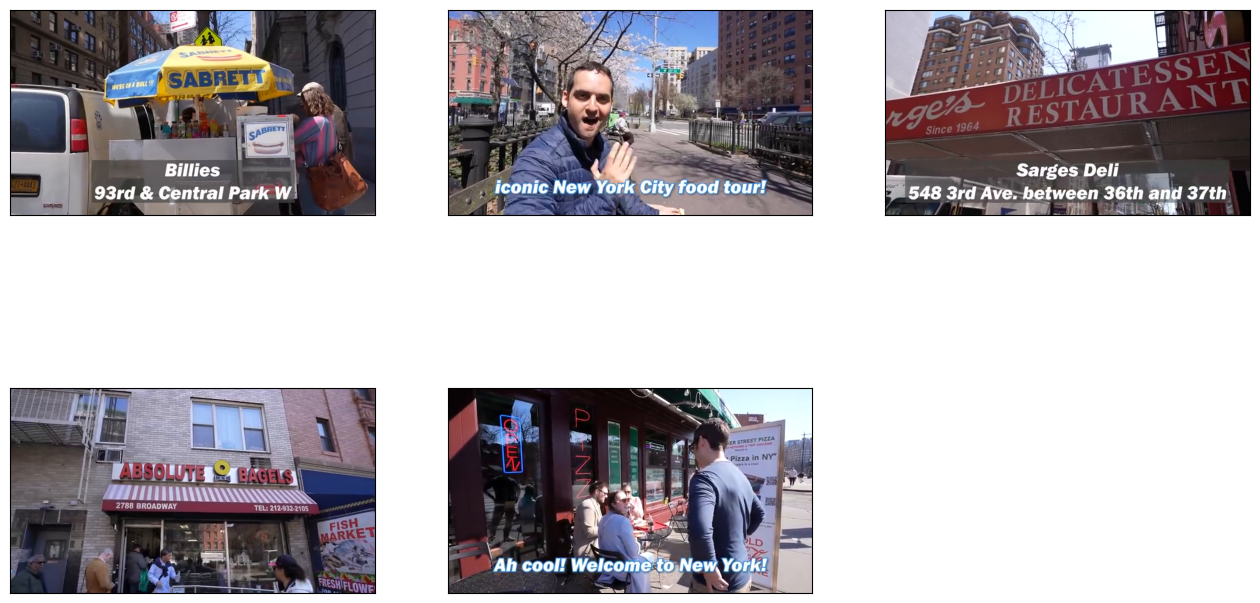

In [ ]:
query_str = query_strs[0]

print(f"Query: {query_str}\n")

# list of images, and list of output text
# source_length:length of text output to print.
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str, source_length=300)

#image document contains the images we want to process in multi-modal prompt to LLM
image_documents = SimpleDirectoryReader(
    input_dir=output_folder, input_files=img
).load_data()

context_str = "".join(txt)
plot_images(img)

# Send the text and images to llm to answer the question

## input prompt

In [ ]:
import json

qa_tmpl_str = (
    "Given the included images and author's transcript retrieved from the video, \n"
    "accurately and precisely answer the query without any additional prior knowledge.\n"
    "Ensure honesty and responsibility, refraining from any racist or sexist remarks.\n"
    "Don't respond with information that is not present in provided images and text.\n"
    "If you cannot provide information based on the provided images and text, say 'I cannot provide answer based on provided information'.\n"
    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

## multiModal llm model

In [ ]:

#specify the MultiModal OpenAI model to use.
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o-mini"
)


In [ ]:
mm_llm = openai_mm_llm

In [ ]:
response_1 = mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str, query_str=query_str, metadata_str={}
    ),
    image_documents=image_documents,
)
pprint(response_1.text)

('The best food locations in NYC mentioned are:\n'
 '\n'
 '1. Billies - 93rd & Central Park W (Hot dog stand)\n'
 '2. Sarges Deli - 53rd Ave. between 36th and 37th\n'
 '3. Absolute Bagels - 2788 Broadway\n'
 '4. Pizzeria (specific name not provided)')


## Gemini example

In [ ]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

mm_llm = GeminiMultiModal(
    model_name="models/gemini-1.5-pro", api_key=GOOGLE_API_KEY, max_new_tokens=1500
)


response_1 = mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str, query_str=query_str
    ),
    image_documents=image_documents,
)

pprint(response_1.text)

('Based on the images and captions, some food locations in NYC shown as part '
 'of an "iconic New York City food tour" are:\n'
 '\n'
 '* **Billies:** Located at 93rd & Central Park W, seemingly a hot dog stand.\n'
 '* **Sarges Deli:** Located at 548 3rd Ave. between 36th and 37th.\n'
 '* **Absolute Bagels:** Located at 2788 Broadway.\n'
 '* **Joe\'s Pizza:** (Inferred from last image and caption "Welcome to New '
 'York", common association with NYC).  The exact address is not provided.')
